In [1]:
from __future__ import annotations

In [2]:
from IPython.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [3]:
import os
import pydot
import datetime
import numpy as np
import sklearn.metrics
import tensorflow as tf
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style('dark')
sns.set(rc={'figure.figsize': (10, 10), 'axes.grid': False})

In [4]:
rng = np.random.default_rng()

In [5]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print('GPU enable')
    except:
        print('GPU not enable')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU enable


In [6]:
def plot_grid(X, ncols=2, nrows=2, figsize=(10, 10), hide_axes=True):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    imgs = X[rng.choice(np.arange(X.shape[0]), size=ax.shape)].reshape(*ax.shape, 28, 28)
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i, j].imshow(imgs[i, j], cmap='gray')
            if hide_axes:
                ax[i, j].get_xaxis().set_visible(False)
                ax[i, j].get_yaxis().set_visible(False)

In [7]:
def plot_grid_and_label(X, y, model, ncols=2, nrows=2, figsize=(10, 10), hide_axes=True, flatten_image=True, label_description=None):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    idx = rng.choice(np.arange(X.shape[0]), size=ax.shape)
    imgs, labels = X[idx], y[idx]
    inputs = imgs.reshape(-1, *imgs.shape[2:])
    
    if flatten_image:
        inputs = inputs.reshape(nrows * ncols, -1)
        
    map_label = (lambda x: x) if label_description is None else (lambda x: label_description[x])
        
    preds = np.argmax(tf.nn.softmax(model.predict(inputs)), axis=-1).reshape(nrows, ncols)
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i, j].imshow(imgs[i, j], cmap='gray')
            ax[i, j].set_title(f'label: {map_label(labels[i, j])}, prediction: {map_label(preds[i, j])}')
            if hide_axes:
                ax[i, j].get_xaxis().set_visible(False)
                ax[i, j].get_yaxis().set_visible(False)

In [38]:
label_description = [
     'A',   'I',   'U',  'E',  'O',
    'KA',  'KI',  'KU', 'KE', 'KO',
    'SA', 'SHI',  'SU', 'SE', 'SO',
    'TA', 'CHI', 'TSU', 'TE', 'TO',
    'NA',  'NI',  'NU', 'NE', 'NO',
    'HA',  'HI',  'FU', 'HE', 'HO',
    'MA',  'MI',  'MU', 'ME', 'MO',
    'YA',         'YU',       'YO',
    'RA',  'RI',  'RU', 'RE', 'RO',
    'WA',  'II',        'EE', 'WO',
     'N',  'IT'
]

In [39]:
X, y = sklearn.datasets.fetch_openml('Kuzushiji-49', version=1, return_X_y=True, as_frame=False)
y = np.array(list(map(int, y)))
X_train, X_test, y_train, y_test = train_test_split(X, y)

c:\Users\dmitry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [41]:
counts = { j: np.sum(y_train == i) for i, j in enumerate(label_description) }

In [42]:
counts # what to do with imbalanced classes?

{'A': 5225,
 'I': 5309,
 'U': 5271,
 'E': 668,
 'O': 5283,
 'KA': 5193,
 'KI': 5264,
 'KU': 5284,
 'KE': 4179,
 'KO': 5287,
 'SA': 5215,
 'SHI': 5261,
 'SU': 5252,
 'SE': 3599,
 'SO': 3386,
 'TA': 5218,
 'CHI': 2210,
 'TSU': 5284,
 'TE': 5288,
 'TO': 5304,
 'NA': 5185,
 'NI': 5231,
 'NU': 1796,
 'NE': 2140,
 'NO': 5213,
 'HA': 5237,
 'HI': 4486,
 'FU': 5233,
 'HE': 5216,
 'HO': 1746,
 'MA': 5227,
 'MI': 2681,
 'MU': 1505,
 'ME': 2896,
 'MO': 5259,
 'YA': 5233,
 'YU': 1418,
 'YO': 5281,
 'RA': 5241,
 'RI': 5222,
 'RU': 5225,
 'RE': 5278,
 'RO': 1915,
 'WA': 2096,
 'II': 362,
 'EE': 336,
 'WO': 5205,
 'N': 5248,
 'IT': 3093}

In [43]:
counter = 0
for key, value in counts.items():
    counter += value
counter /= 49

In [44]:
class_weights = {}
i = 0
for _, value in counts.items():
    class_weights[i] = (counter / value)
    i += 1


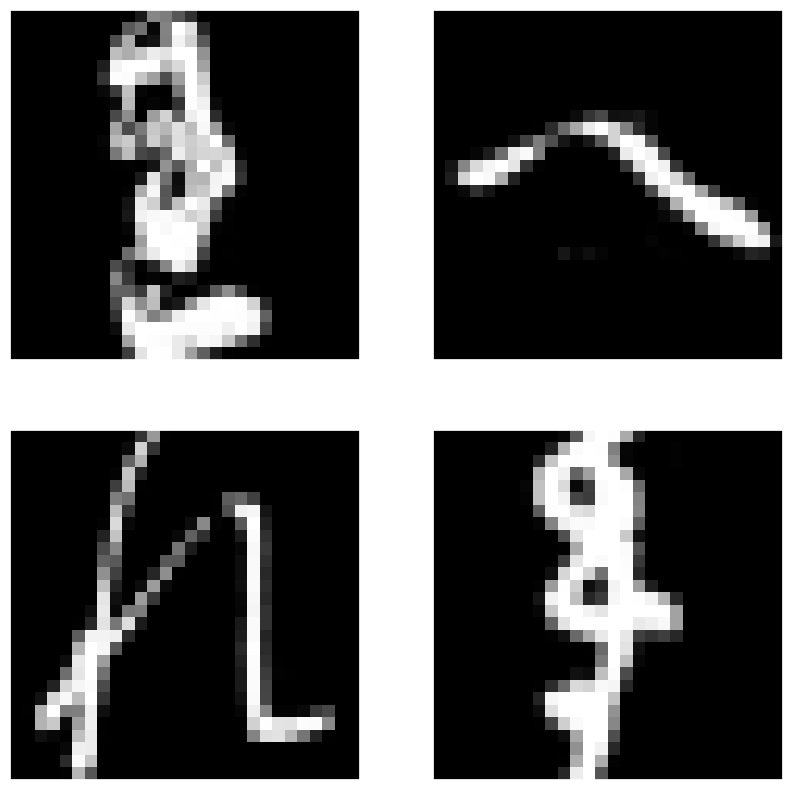

In [45]:
plot_grid(X_train)

## Flattened images
Use Dense layers

In [ ]:
# create train and validation datasets, these datasets should use flattened images

In [46]:
train_data = tf.data.Dataset.from_tensor_slices(X_train).map(lambda x: tf.cast(x / 255, tf.float32))
train_labels = tf.data.Dataset.from_tensor_slices(y_train)
train_dataset = tf.data.Dataset.zip((train_data, train_labels)).batch(32)

val_data = tf.data.Dataset.from_tensor_slices(X_test).map(lambda x: tf.cast(x / 255, tf.float32))
val_labels = tf.data.Dataset.from_tensor_slices(y_test)
val_dataset = tf.data.Dataset.zip((val_data, val_labels)).batch(32)

In [ ]:
# create model, this model should accept a flattened image

In [47]:
inputs = tf.keras.layers.Input((784,), name='input')
x = tf.keras.layers.Dense(512, activation='relu', name='dense1')(inputs)
x = tf.keras.layers.Dense(256, activation='relu', name='dense2')(x)
x = tf.keras.layers.Dense(128, activation='relu', name='dense3')(x)
x = tf.keras.layers.Dense(49, activation='softmax', name='output')(x)
model = tf.keras.Model(inputs=inputs, outputs=x, name='kuzuzuzu49')

In [48]:
model.summary()

Model: "kuzuzuzu49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 dense1 (Dense)              (None, 512)               401920    
                                                                 
 dense2 (Dense)              (None, 256)               131328    
                                                                 
 dense3 (Dense)              (None, 128)               32896     
                                                                 
 output (Dense)              (None, 49)                6321      
                                                                 
Total params: 572,465
Trainable params: 572,465
Non-trainable params: 0
_________________________________________________________________


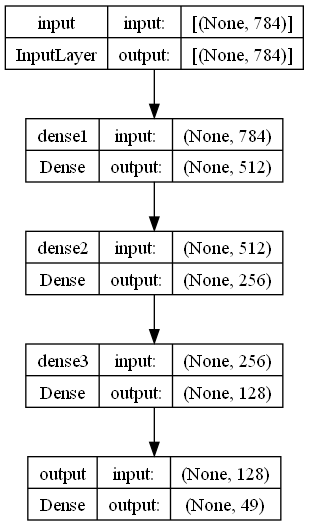

In [49]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [50]:
logdir = os.path.join('logs/kuzushiji-49/', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [51]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(logdir, save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(logdir, update_freq=10)
]

In [ ]:
# compile the model, make sure to add accuracy metric

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', ])

In [ ]:
# train the model, make sure to use callbacks and validation dataset

In [53]:
model.fit(train_dataset, validation_data=val_dataset, epochs=2, callbacks=callbacks, class_weight=class_weights)

Epoch 1/2
6350/6350 [==============================] - 46s 7ms/step - loss: 0.8400 - accuracy: 0.7737 - val_loss: 0.5524 - val_accuracy: 0.8508
Epoch 2/2
6350/6350 [==============================] - 42s 7ms/step - loss: 0.4439 - accuracy: 0.8731 - val_loss: 0.4817 - val_accuracy: 0.8728


In [54]:
images = X_test.reshape(-1, 28, 28, 1) / 255 # normalize if needed

1/1 [==============================] - 0s 71ms/step


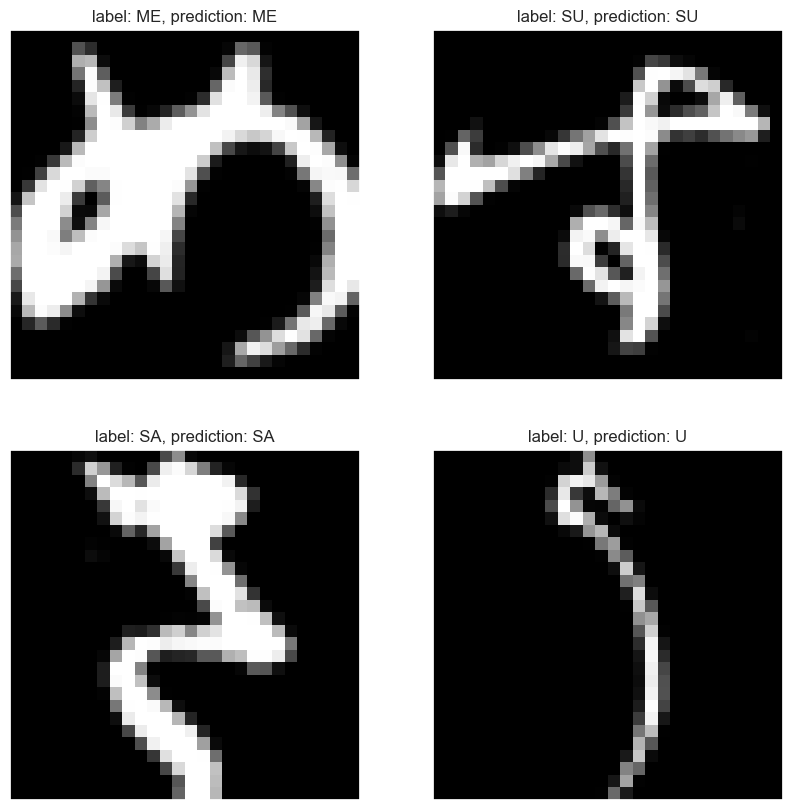

In [55]:
plot_grid_and_label(images, y_test, model, label_description=label_description)

In [56]:
y_pred = model.predict(X_test / 255, verbose=False).argmax(axis=-1) # make predictions

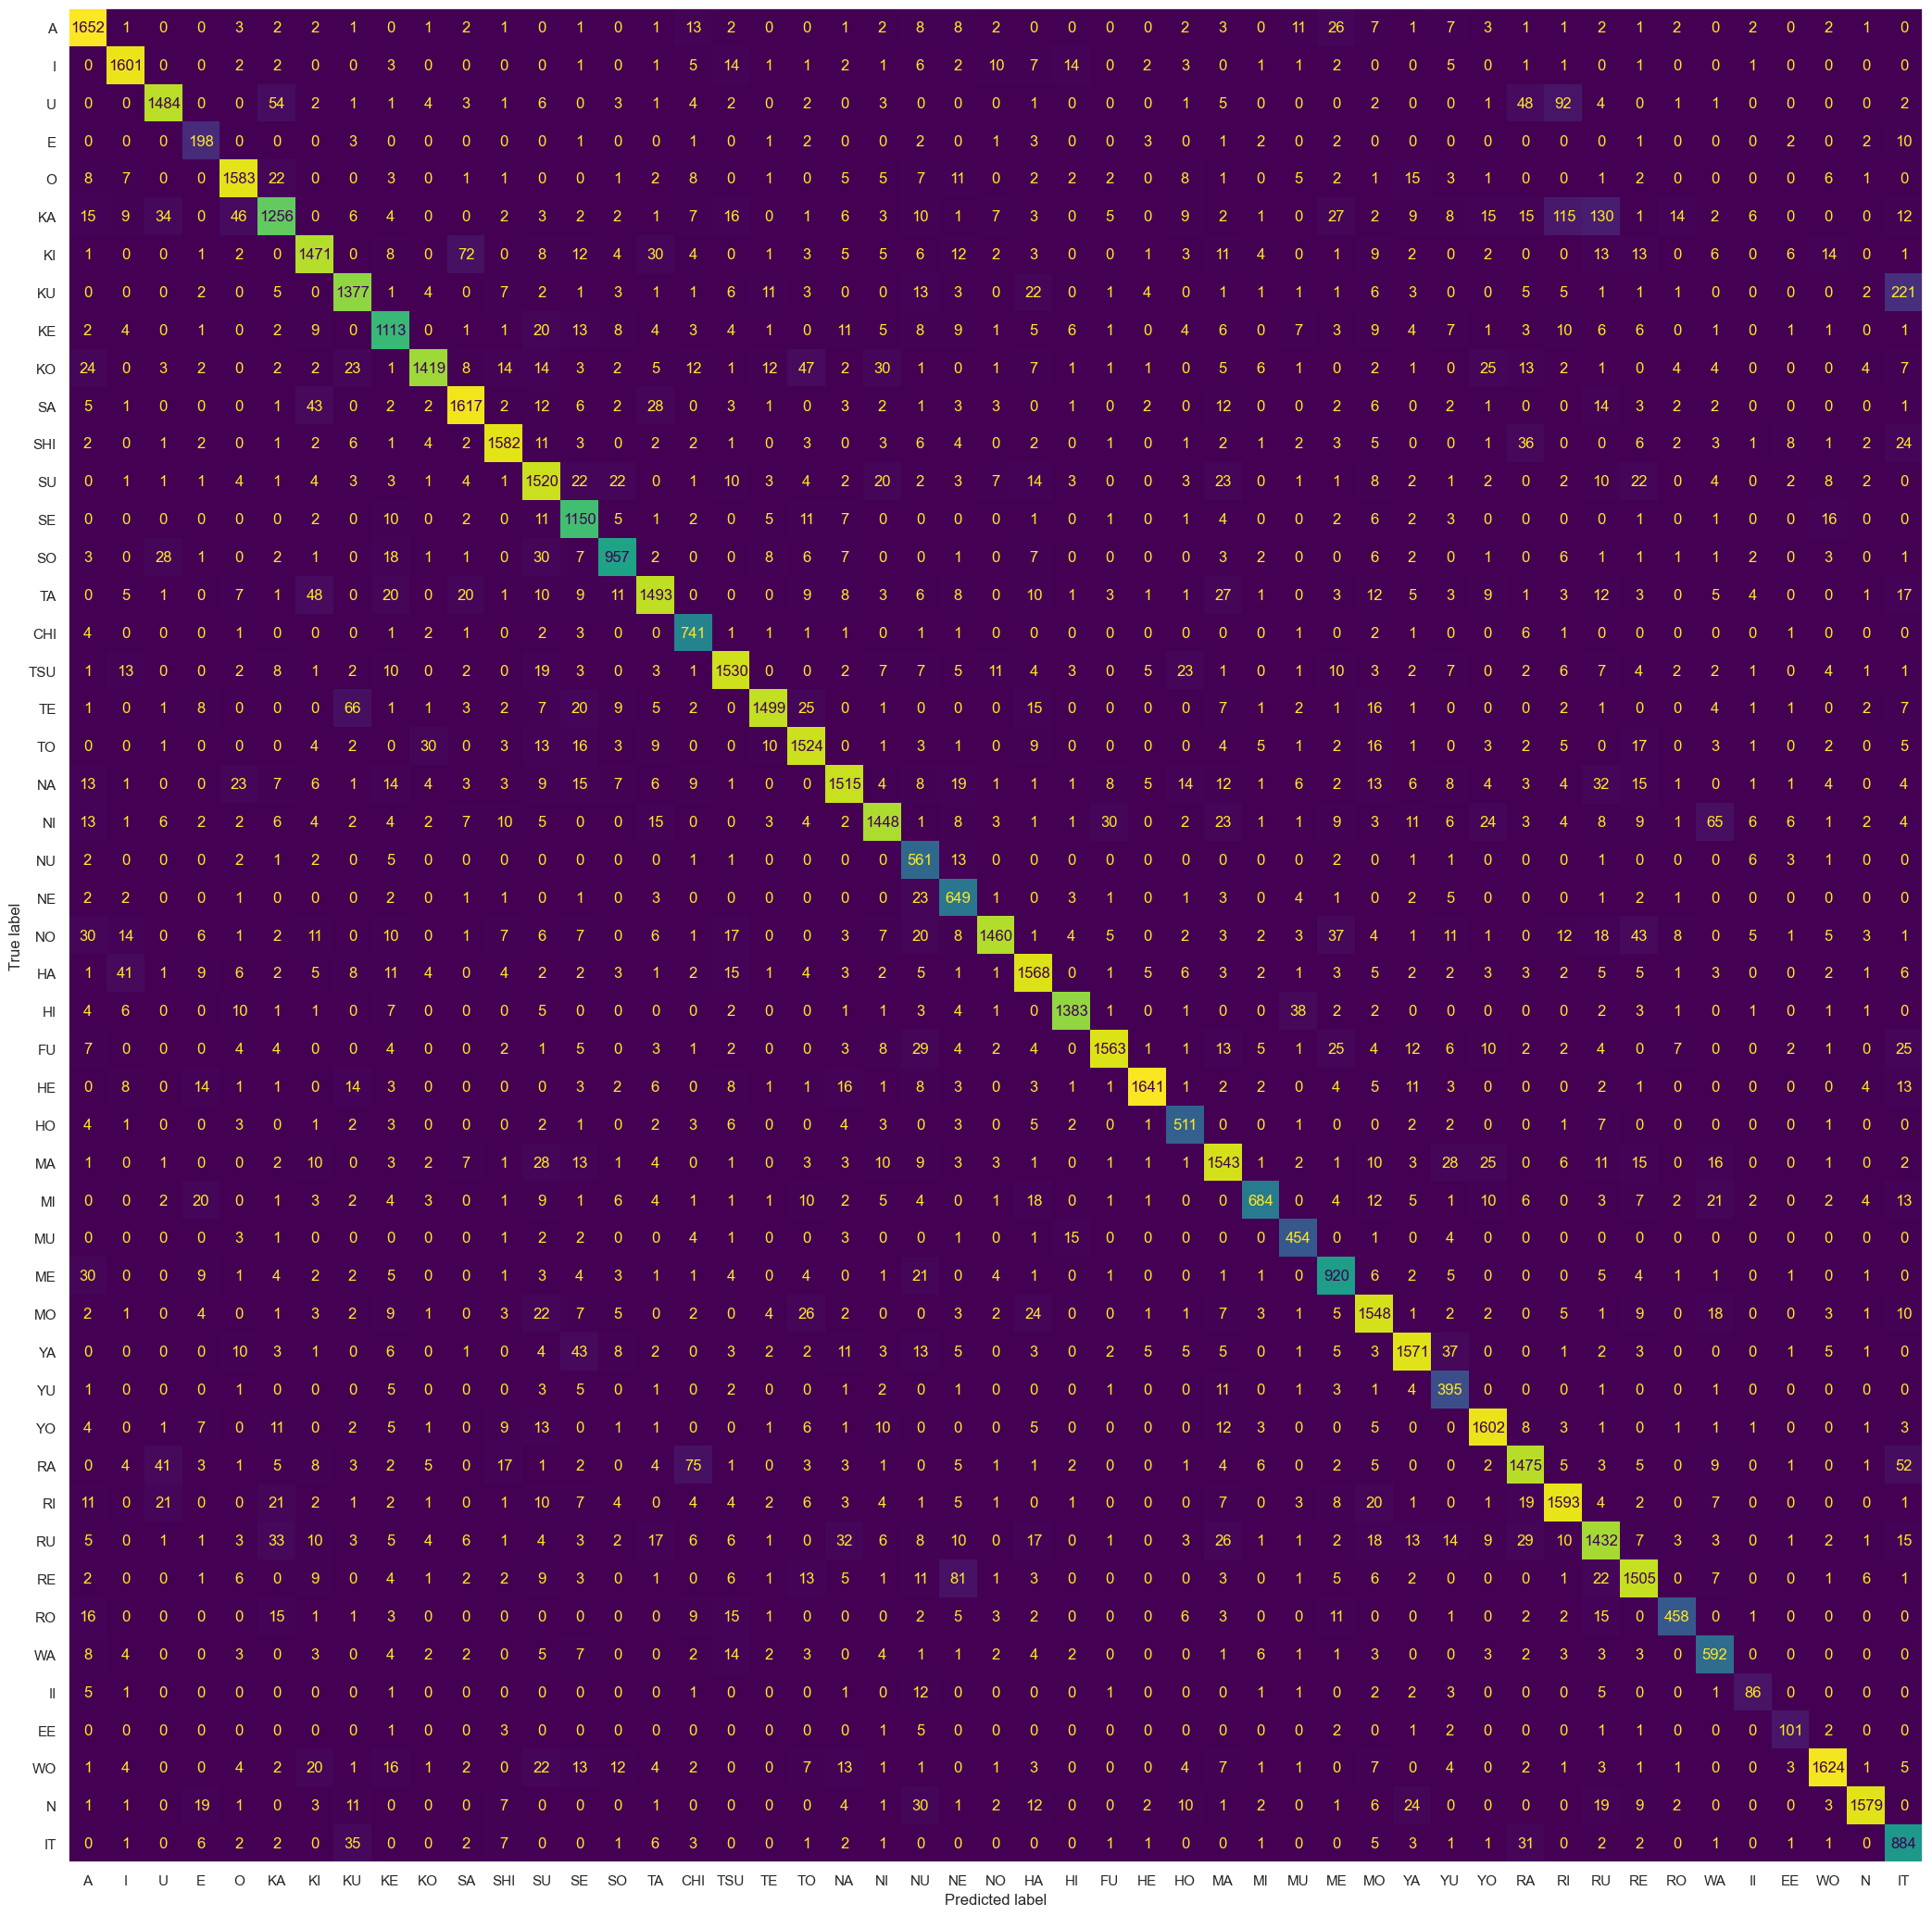

In [57]:
_, ax = plt.subplots(figsize=(26, 26))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_description, ax=ax, colorbar=False)

##### Balanced accuracy

In [58]:
accuracy = y_test == y_pred
np.mean([np.mean(accuracy[y_test == i]) for i in range(49)])

0.8704920867140412

## Actual images
Use Conv2D layers with Dense layer on top

In [ ]:
# create train and validation datasets, these datasets should use 28x28x1 images

In [59]:
train_data = tf.data.Dataset.from_tensor_slices(X_train).map(lambda x: tf.cast(tf.reshape(x, (28, 28, 1)) / 255, tf.float32))
train_labels = tf.data.Dataset.from_tensor_slices(y_train)
train_dataset = tf.data.Dataset.zip((train_data, train_labels)).batch(32)

val_data = tf.data.Dataset.from_tensor_slices(X_test).map(lambda x: tf.cast(tf.reshape(x, (28, 28, 1)) / 255, tf.float32))
val_labels = tf.data.Dataset.from_tensor_slices(y_test)
val_dataset = tf.data.Dataset.zip((val_data, val_labels)).batch(32)

In [ ]:
# create model, this model should accept a 28x28x1 image

In [60]:
inputs = tf.keras.layers.Input((28, 28, 1), name='input')
x = tf.keras.layers.Conv2D(8,  3, activation='relu', name='conv1')(inputs)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', name='conv2')(x)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', name='conv3')(x)
x = tf.keras.layers.Flatten(name='flatten')(x)
x = tf.keras.layers.Dense(49,  activation='softmax', name='output')(x)
model = tf.keras.Model(inputs=inputs, outputs=x, name='crazyhead')

In [61]:
model.summary()

Model: "crazyhead"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 26, 26, 8)         80        
                                                                 
 conv2 (Conv2D)              (None, 24, 24, 32)        2336      
                                                                 
 conv3 (Conv2D)              (None, 22, 22, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 output (Dense)              (None, 49)                758961    
                                                                 
Total params: 770,625
Trainable params: 770,625
Non-train

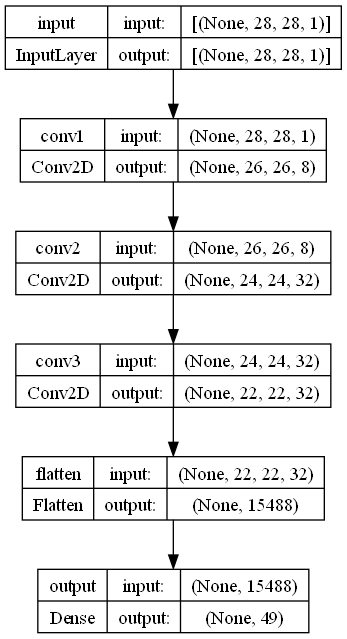

In [62]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [63]:
logdir = os.path.join('logs/kuzushiji-49/', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [64]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(logdir, save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(logdir, update_freq=10)
]

In [ ]:
# compile the model, make sure to add accuracy metric

In [65]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', ])

In [ ]:
# train the model, make sure to use callbacks and validation dataset

In [66]:
model.fit(train_dataset, validation_data=val_dataset, epochs=2, callbacks=callbacks, class_weight=class_weights)

Epoch 1/2
6350/6350 [==============================] - ETA: 0s - loss: 0.5203 - accuracy: 0.8653

INFO:tensorflow:Assets written to: logs/kuzushiji-49\20230617-152207\assets


INFO:tensorflow:Assets written to: logs/kuzushiji-49\20230617-152207\assets


6350/6350 [==============================] - 40s 5ms/step - loss: 0.5203 - accuracy: 0.8653 - val_loss: 0.3164 - val_accuracy: 0.9155
Epoch 2/2
6348/6350 [============================>.] - ETA: 0s - loss: 0.2084 - accuracy: 0.9401

INFO:tensorflow:Assets written to: logs/kuzushiji-49\20230617-152207\assets


INFO:tensorflow:Assets written to: logs/kuzushiji-49\20230617-152207\assets


6350/6350 [==============================] - 34s 5ms/step - loss: 0.2084 - accuracy: 0.9401 - val_loss: 0.3145 - val_accuracy: 0.9234


In [67]:
images = X_test.reshape(-1, 28, 28, 1) # normalize if needed

1/1 [==============================] - 0s 364ms/step


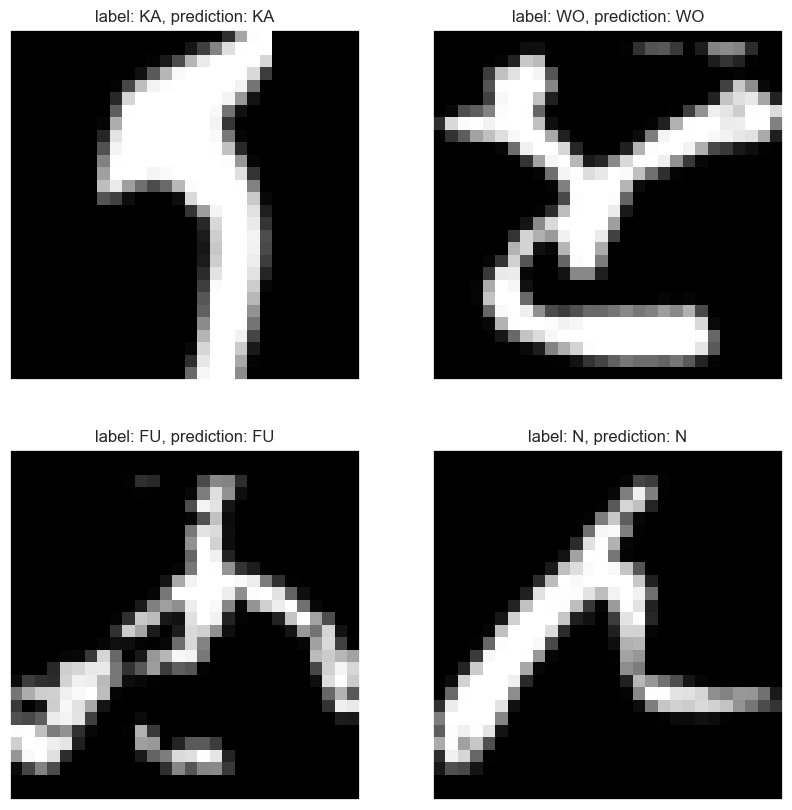

In [68]:
plot_grid_and_label(images, y_test, model, label_description=label_description, flatten_image=False)

In [69]:
y_pred = model.predict(X_test.reshape(-1, 28, 28, 1) / 255, verbose=False).argmax(axis=-1) # make predictions

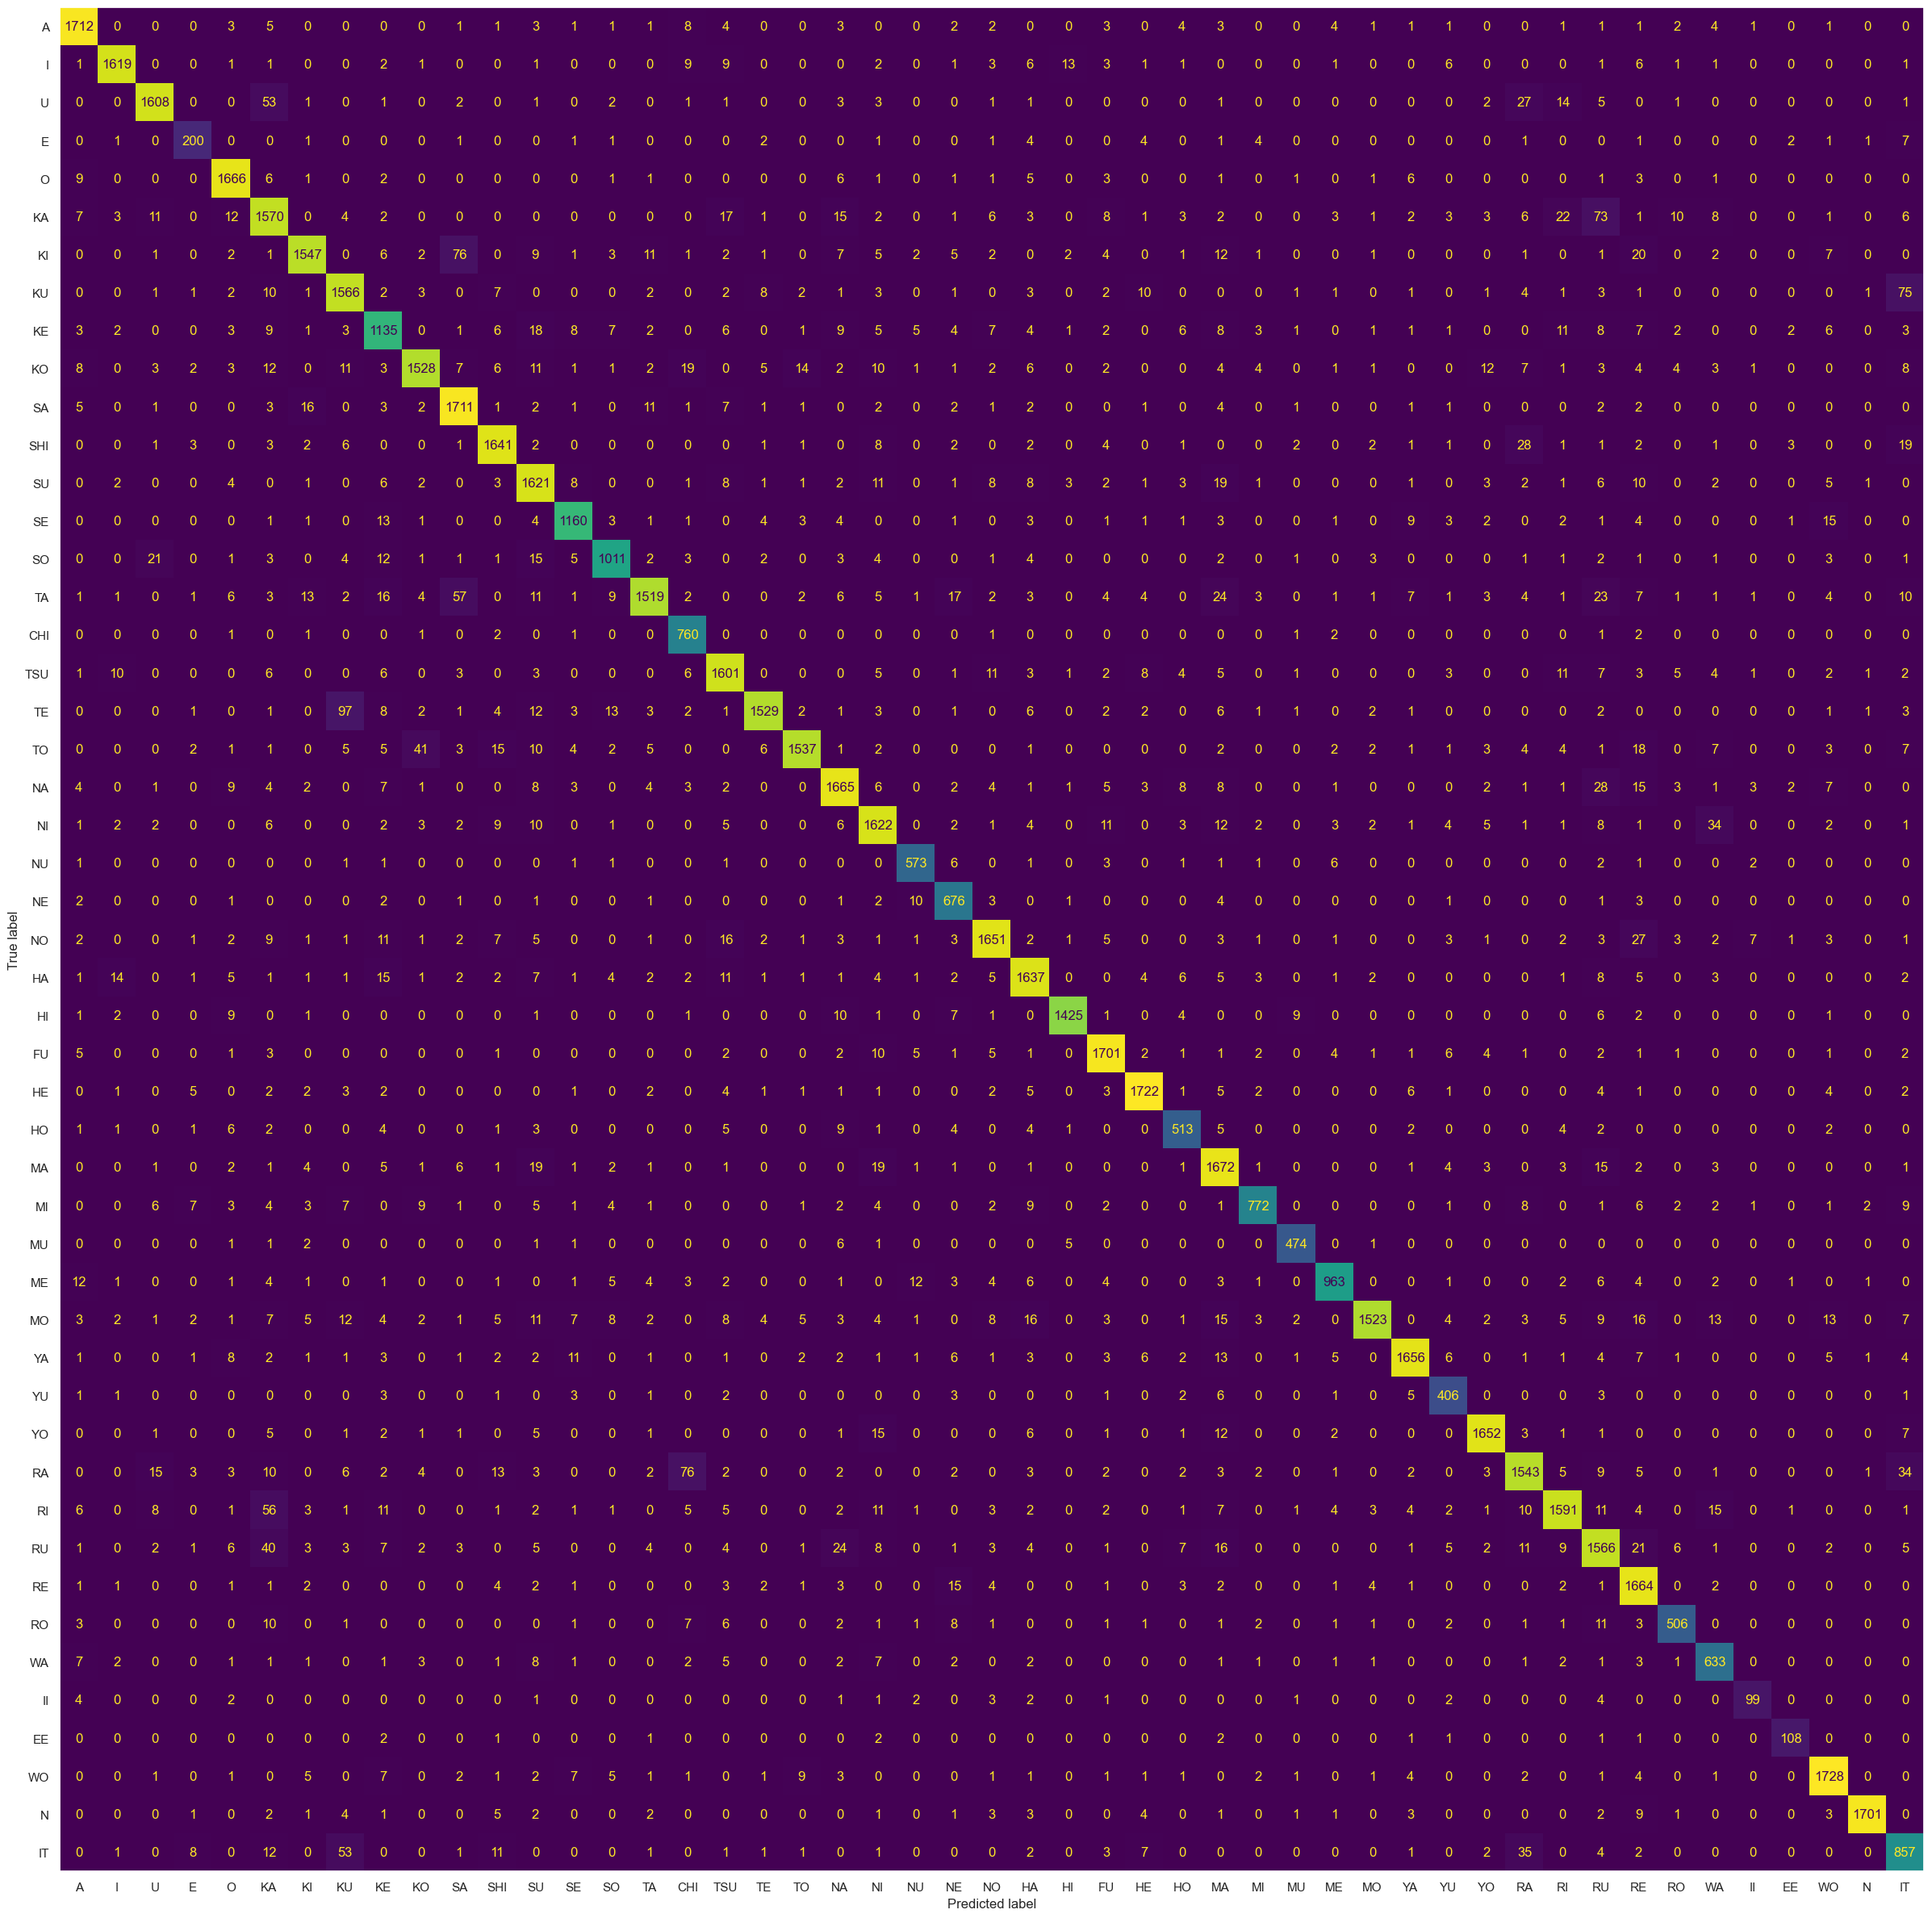

In [70]:
_, ax = plt.subplots(figsize=(30, 30))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_description, ax=ax, colorbar=False)

##### Balanced accuracy

In [71]:
accuracy = y_test == y_pred
np.mean([np.mean(accuracy[y_test == i]) for i in range(49)])

0.9191469683219436